# Coffee Usage

Python notebook for analysing the coffee usage in the NBI HEP group, and determining the length of the Christmas vacation from a fit to it. The exercise lies in writing a stepwise fit function, and making it work on real data.

For a period in 2009-2010, the usage of the old coffey machine in the NBI HEP group was (somewhat irregularly) monitored. Below is the count of total number of cups of coffey ever brewed at given dates. We will mainly focus on the data from around Christmas...


- 28479   4/11-2009     NOTE: This day, we in the following define as day 0! 
- 28674  13/11-2009 
- 28777  18/11-2009 
- 28964  25/11-2009 
- 29041  27/11-2009 
- 29374  10/12-2009 
- ~29650   8/ 1-2010
- 30001  29/ 1-2010 (?)
- 30221   8/ 2-2010
- 30498  21/ 2-2010
- 32412  17/ 5-2010
- 33676  11/ 8-2010
- 34008   9/ 9-2010`

### Author: 
- Troels C. Petersen (Niels Bohr Institute)

### Date:    
- 29-11-2024 (latest update)

***

In [123]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit import cost
from scipy import stats

and define the parameters of the program:

In [124]:
save_plots = False

## Fitting functions:

First we define a simple linear function:

In [125]:
def func_coffee_simple(x, p0, p1): 
    return p0 + p1*x

Now YOU should add an extra parameter, which is the length of the vacation:

In [126]:
def func_coffee_advanced(x, p0, p1, len_vac):
    
    # Define when the vacation is (i.e. which points are before and which are after).
    # This could in itself be a fitting parameter, but for now we keep things simple.
    start_vacation = 40.0       # I.e. 40 days after the first date, which 4th of November
    end_vacation = start_vacation + len_vac

    if x <= start_vacation:
        return p0 + p1*x 
    
    if x >= end_vacation:
        return p0 + p1*(x-len_vac)
    
    if x > start_vacation and x < end_vacation:
        return func_coffee_advanced(start_vacation, p0, p1, len_vac)
    # Here goes your function in terms of p0, p1, and p2 (vacation length)...      # Just a silly function - change this yourself to include "if" statement
    
# Numpy-way of "vectorizing" the function above:
func_coffee_advanced_vec = np.vectorize(func_coffee_advanced)

In [127]:
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

The reason why we are using the last line is to allow `func_coffee_advanced` to take Numpy arrays as inputs, so we do not have to loop over entire lists.

## Coffee Usage

Data set (So small that we will not use a seperate file for it!). We define 4th of November 2009 to be day 0, and count from there.

In [128]:
days = np.array([     0,     9,    14,    21,    23,    36,    65,    76,    86,    99,   194,   280,   309 ])
cups = np.array([ 28479, 28674, 28777, 28964, 29041, 29374, 29650, 30001, 30221, 30498, 32412, 33676, 34008 ])
edays = np.zeros_like(days)
ecups = np.ones_like(cups)*30.0   # I estimate the uncertainty to be 30 cups, but perhaps you disagree?
                                  # Certainly, it is NOT the square root, as it is not at all a Poisson number!

# Print the number of days:
for day, cup in zip(days, cups):
    print(f"days: {day:3.0f}    cups: {cup:5.0f}")

days:   0    cups: 28479
days:   9    cups: 28674
days:  14    cups: 28777
days:  21    cups: 28964
days:  23    cups: 29041
days:  36    cups: 29374
days:  65    cups: 29650
days:  76    cups: 30001
days:  86    cups: 30221
days:  99    cups: 30498
days: 194    cups: 32412
days: 280    cups: 33676
days: 309    cups: 34008


## Fit and plot graph on screen:

In [129]:
# Define the relevant range:
xmin, xmax = 60, 105
mask_range = (xmin < days) & (days < xmax)

# Fit the data points in the range (xmin, xmax)
mfit_coffee = cost.LeastSquares(days[mask_range], cups[mask_range], ecups[mask_range], func_coffee_simple)
mfit_coffee = Minuit(mfit_coffee, p0=28000.0, p1=20.0)
mfit_coffee.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.666 (χ²/ndof = 2.3)      │              Nfcn = 36               │
│ EDM = 4.83e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p0   │  28.09e3  │  0.10e3   │            │            │         │         │       │
│ 1 │ p1   │   24.6    │    1.2    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────┐
│    │       p0       p1 │
├────┼───────────────────┤
│ p0 │ 9.73e+03   -116.6 │
│ p1 │   -116.6     1.43 │
└────┴───────────────────┘

In [130]:
p0, p1 = mfit_coffee.values[:]

print("Simple fit")
for name in mfit_coffee.parameters:
    print("Fit value: {0} = {1:.5f} +/- {2:.5f}".format(name, mfit_coffee.values[name], mfit_coffee.errors[name]))

Simple fit
Fit value: p0 = 28086.87440 +/- 98.63542
Fit value: p1 = 24.60890 +/- 1.19617


Plot the data along with the fit on top of the data:

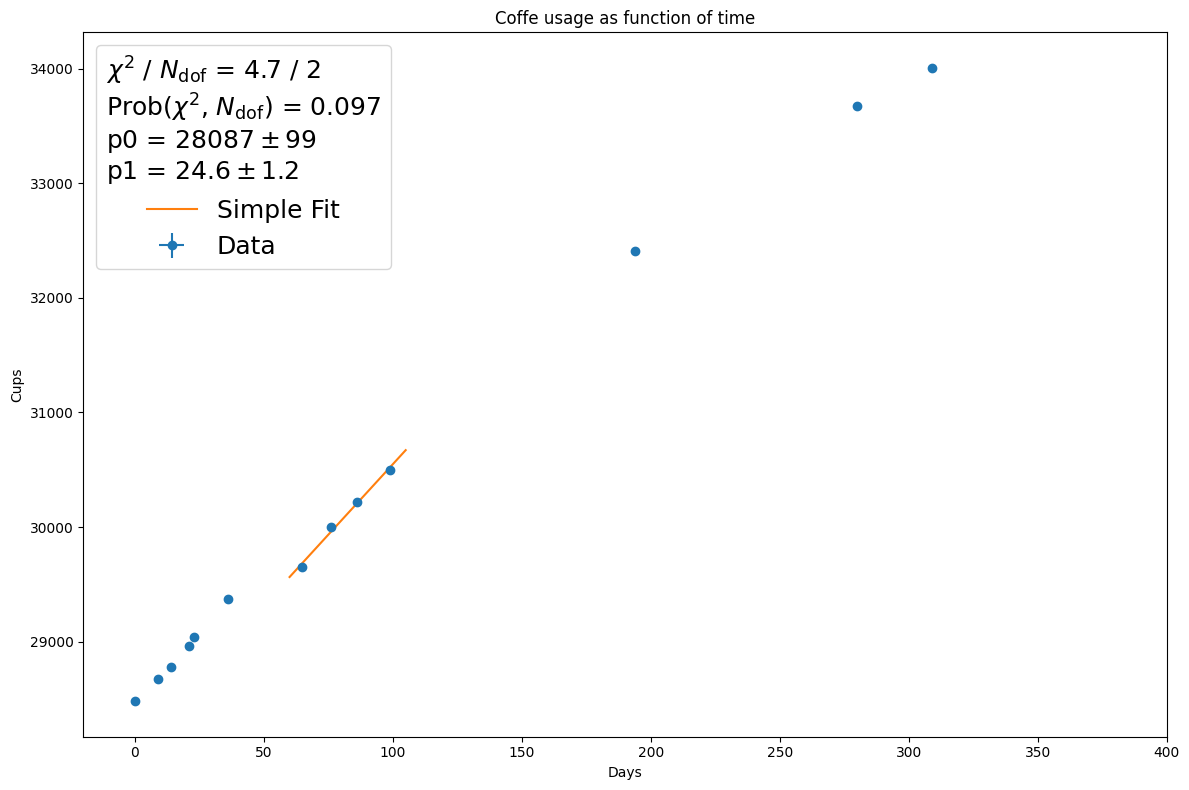

In [131]:
# Plot the data:
fig, ax = plt.subplots(figsize=(12, 8))
ax.errorbar(days, cups, xerr=edays, yerr=ecups, fmt='o', label='Data')
ax.set(xlim=(-20, 400), xlabel='Days', ylabel='Cups', title='Coffe usage as function of time')

# Plot the fit on top:
x_fit = np.linspace(xmin, xmax, 1000)
y_fit = func_coffee_simple(x_fit, *mfit_coffee.values[:])
ax.plot(x_fit, y_fit, '-', label='Simple Fit')

# Get the ChiSquare probability:
chi2_lin = mfit_coffee.fval
Ndof_lin = len(days[mask_range]) - len(mfit_coffee.values[:])
Prob_lin = stats.chi2.sf(chi2_lin, Ndof_lin)

fit_info = [f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {chi2_lin:.1f} / {Ndof_lin}", f"Prob($\\chi^2$, $N_\\mathrm{{dof}}$) = {Prob_lin:.3f}",]
for p, v, e in zip(mfit_coffee.parameters, mfit_coffee.values[:], mfit_coffee.errors[:]) :
    Ndecimals = max(0,-np.int32(np.log10(e)-1-np.log10(2)))                                # Number of significant digits
    fit_info.append(f'{p} = ${v:{10}.{Ndecimals}{"f"}} \\pm {e:{10}.{Ndecimals}{"f"}}$')

plt.legend(title="\n".join(fit_info), fontsize=18, title_fontsize = 18, alignment = 'center');
fig.tight_layout()

## Advanced fit:
Try to fit the advanced function in the range (-10, 110):

In [132]:
xmin, xmax = -10, 110
mask_range = (xmin < days) & (days < xmax)

def fit(x, p0, p1, len_vac):
    values = np.array([])

    for i in range(len(x)):
        values = np.append(values, func_coffee_advanced(x[i], p0, p1, len_vac))

    return values


# fit the data points in the range (xmin, xmax)
mfit_coffee2 = cost.LeastSquares(days[mask_range], cups[mask_range], ecups[mask_range], fit)
minuit_coffee2 = Minuit(mfit_coffee2, p0=28500, p1=25, len_vac=14.0)
minuit_coffee2.migrad()

p0, p1, len_vac = minuit_coffee2.values[:]
print("Advanced fit")
for name in minuit_coffee2.parameters:
    print("Fit value: {0} = {1:.5f} +/- {2:.5f}".format(name, minuit_coffee2.values[name], minuit_coffee2.errors[name]))

print(*minuit_coffee2.values[:])

Advanced fit
Fit value: p0 = 28457.62137 +/- 18.41000
Fit value: p1 = 24.88613 +/- 0.80069
Fit value: len_vac = 15.80558 +/- 1.74449
28457.621365057268 24.886128692310677 15.80557735048092


and plot the advanced fit:

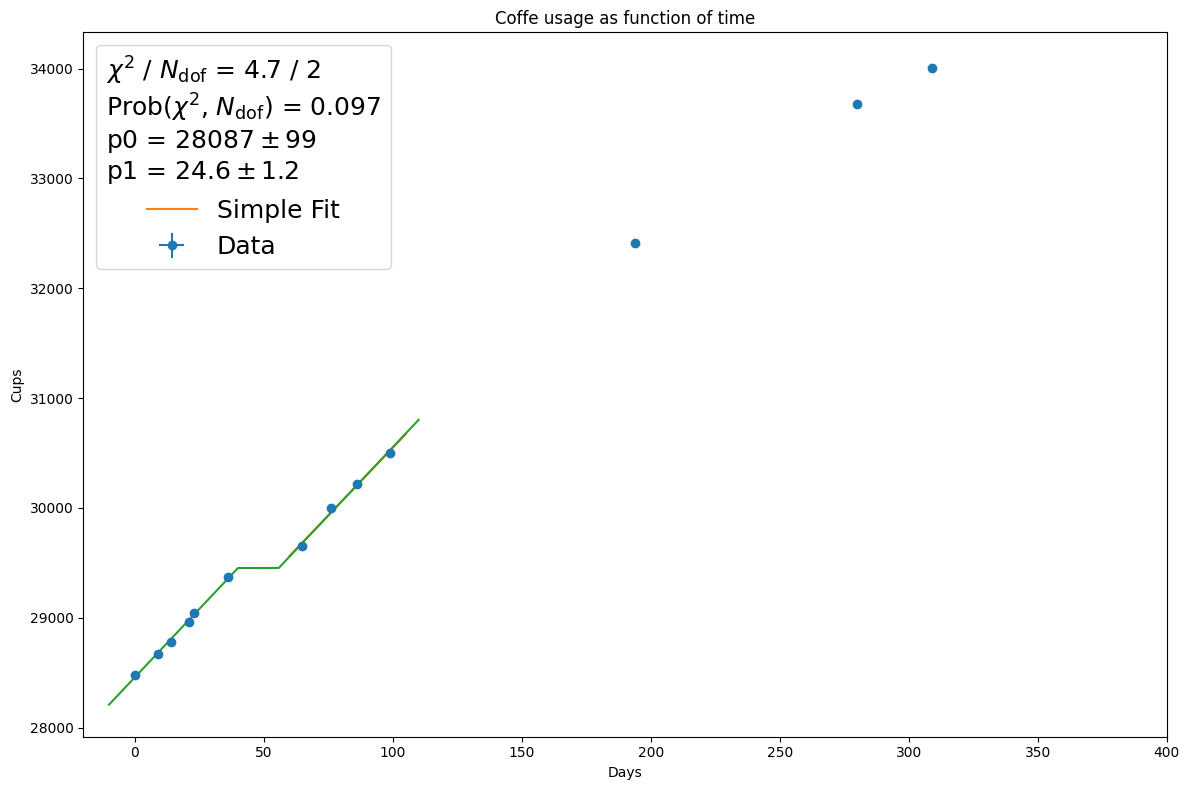

In [133]:
x_fit = np.linspace(xmin, xmax, 1000)
y_fit = fit(x_fit, minuit_coffee2.values['p0'], minuit_coffee2.values['p1'], minuit_coffee2.values['len_vac'])
ax.plot(x_fit, y_fit, '-', label='Advanced Fit')
fig

In [137]:
print(f"\n\nThe fitted effective vacation length was: {minuit_coffee2.values['len_vac']:4.1f} +- {minuit_coffee2.errors['len_vac']:3.1f} days!\n")



The fitted effective vacation length was: 15.8 +- 1.7 days!



This is of course absurd, but that is because p2 does not represent the length of the Christmas vacation. Change the advanced fit, such that it does, and see if you get a reasonable vacation length estimate out.

# Questions:

First, only consider the first 100 days of data.

0. From the ChiSquare of the linear fit to four points (65-100 days), is the estimated uncertainty of 30 cups reasonable?

1. Assuming the error of 30 cups, do the numbers follow the hypothesis of constant use? Quantify this, and find out how large the error has to be (roughly), for this hypothesis to be credible.

2. Does taking into account Christmas vacation looks like it will improve the above hypothesis? Can you actually fit the length of vacation? Try to rewrite the function "func_coffee_advanced", such that it includes "if", dividing the function into two linear functions with the same slope, that has an interval with no usage (i.e. the Christmas vacation). What length do you obtain? And how much better is the model?

Now consider the whole data set.

3. The total number of cups of coffey ever brewed was 36716, after which the old coffey machine was decommissioned. From the above data, estimate when this happened (including error!). And when would you estimate that the coffey machine was commissioned originally?

# Learning points:

From questions 0-2 you should learn how to make "complicated" fitting functions, which might include discontinuities or even more advanced parts (e.g. a simulation of the Universe or the likes)!

From question 3 you should learn how to extrapolate a fit into the future, and think about the pitfalls that such an extrapolation contains.